<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Conservación del momentum angular y el plano de Laplace en el problema de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 16 de Febrero de 2024</center><h5>
<h5><center><b>Entrega</b>: 1 de Marzo de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Mariana Gómez Cuartas

<br/>
<b>Última actualización</b>: 29/02/2024
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es estudiar "experimentalmente" (computacionalmente) la conservación del momentum angular en sistemas de N cuerpos, incluyendo el sistema solar.


**Procedimiento**:

Para conseguir el objetivo:

1. Genere un sistema de N-cuerpos al azar usando los métodos vistos en clase, con N entre 10 y 20 partículas. Calcule el momentum angular total del sistema, respecto al sistema de referencia en el que se generaron las posiciones y velocidades y con respecto al centro de masa. Calcule también el momento angular del centro de masa. Verifique la relación entre el momento angular total y el momento angular del centro de masa y respecto a ese sistema de referencia. Utilice `REBOUND` para calcular la evolución del sistema. Gráfique, en un mismo `plot` las componentes del momento angular total del sistema como función del tiempo y verifique que efectivamente se mantienen constantes o casi constantes a lo largo del tiempo.

  **Ayuda**: Para calcular el momentum angular respecto al centro de masa puede, en cada paso, después del integrate de `REBOUND` ejecutar esta rutina:

    ```python
    sim.integrate(t)
    # Primero calcule las posiciones y velocidades para el momento angular total
    ...
    
    sim.move_to_com()
    # Ahora si calcule las posicione y velocidades para el momento angular respecto al centro de masa
    ...
    ```
  después de ejecutar `move_to_com` las posiciones y velocidades de las partìculas se calculan respecto al centro de masa.

2. Usando el momentum angular de los planetas y el Sol en el sistema solar, es posible determinar la orientación del plano invariable de Laplace del Sistema. Para ello escoja una fecha arbitraria del tiempo, por ejemplo, una en la que haya ocurrido un evento científico de su interés (el nacimiento de una persona importante para la ciencia, un descubrimiento, etc.). Determine para esa fecha el vector de momento angular total del sistema solar (el Sol y los 8 planetas). Repita el mismo procedimiento para una fecha posterior y verifique que el momentum angular es el mismo.

3. Las componentes cartesianas del momentum angular total calculada en el punto 2, están referidas al sistema de la Eclíptica con eje X apuntando hacia el punto bernal de la época J2000 (2000-01-01 12:00:00 TDB). Determine, usando esas componentes las coordenadas eclípticas hacia las que apunta ese vector. Convierta esas coordenadas en coordenadas ecuatoriales absolutas (ascensión recta y declinación) y estime la ubicación entre las constelaciones en las que se encuentra el *polo de Laplace del Sistema Solar*.

  **Ayuda**: Las coordenadas eclípticas se obtienen convirtiendo las componentes cartesianas del momentum angular en componentes esféricas. Los ángulos resultantes son la longitud y latitud eclíptica. Para la conversión de coordenadas eclítpicas puede usar lo aprendido en el curso de astronomía de posición o preguntar al profesor por un método usando `SPICE`.

4. Calcule, para la fecha en 2, el momentum angular de los planetas individuales. Determine el ángulo que forman esos momentos angulares con respecto al momento angular total. Ese ángulo corresponde a la inclinación de la órbita osculatriz del planeta en el momento del cálculo del momentum angular total. Haga una tabla de esas inclinaciones comparando los valores obtenidos con las inclinaciones orbitales promedio de las órbitas de los planetas con respecto de la eclíptica que pueden consultarse en internet.

  **Ayuda**: Para calcular el ángulo entre dos vectores puede usar el producto punto entre ellos.

5. Estudiemos ahora como cambia la orientación de la órbita de la Tierra con respecto al plano invariable de Laplace, es decir, como cambia el ángulo del momentum angular de la Tierra respecto al momentum angular total. Para ello tomemos un período de tiempo largo, 1 o 2 siglos, lo que permita `SPICE` o `Astroquery`. Haga un gráfico del ángulo en función del tiempo y estudie la figura resultante. Trate de interpretar lo que ve.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráfico de las componentes del momentum angular total del sistema artificial de 1.
  - Gráfico del ángulo de la órbita de la Tierra respecto al plano invariable de Laplace por un período largo de tiempo.

- Datos mínimos:
  - Latitud y longitud eclíptica del *polo de Laplace*.
  - Ascensión recta, declinación y constelación en la que está el polo de Laplace.
  - Inclinaciones de las órbitas osculatrices de los 8 planetas respecto al plano invariable de Laplace en la fecha elegida en 2.
  - Inclinaciones promedio de las órbitas de los planetas respecto al plano de la eclíptica (consulta).

- Gráficos opcionales:
  - Animación del movimiento del sistema en 1.
  - Gráfico del plano de Laplace del sistema en 1 o del Sistema Solar.
  
- **Atención**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

# Solución

In [ ]:
!pip install -Uq pymcel rebound celluloid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.9/744.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 26.6 MB/s eta 0:00:00


In [ ]:
#@title Librerías

import pymcel as pc
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from mpl_toolkits.mplot3d import Axes3D
from celluloid import Camera
from IPython.display import HTML
import pandas as pd
import spiceypy as spy

Paquete pymcel cargado. Versión: 0.5.5


In [ ]:
pc.descarga_kernels()

Creando el directorio con los kernels pymcel//data/...
Descargando kernel 'de430.bsp' en 'pymcel/'...
Hecho.
Descargando kernel 'de430_tech-comments.txt' en 'pymcel/'...
Hecho.
Descargando kernel 'latest_leapseconds.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'naif0012.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_latest_high_prec.bpc' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_fixed.tf' en 'pymcel/'...
Hecho.
Descargando kernel 'gm_de431.tpc' en 'pymcel/'...
Hecho.
Descargando kernel 'pck00011.tpc' en 'pymcel/'...
Hecho.


In [ ]:
spy.furnsh([                                         #miro que base de dato voy a usar
    'pymcel/data/de430.bsp',
    'pymcel/data/gm_de431.tpc',
    'pymcel/data/latest_leapseconds.tls'
    ])

##Observación:
En el siguiente código no se incluyen las imagenes explícitamente de procedimientos o capturas de pantalla de stellarium, sino enlaces de drive que conducen a ellas, pues ponerlas directamente hace que el notebook quede muy pesado

##1.
 Genere un sistema de N-cuerpos al azar usando los métodos vistos en clase, con N entre 10 y 20 partículas. Calcule el momentum angular total del sistema, respecto al sistema de referencia en el que se generaron las posiciones y velocidades y con respecto al centro de masa. Calcule también el momento angular del centro de masa. Verifique la relación entre el momento angular total y el momento angular del centro de masa y respecto a ese sistema de referencia. Utilice `REBOUND` para calcular la evolución del sistema. Gráfique, en un mismo `plot` las componentes del momento angular total del sistema como función del tiempo y verifique que efectivamente se mantienen constantes o casi constantes a lo largo del tiempo.

  **Ayuda**: Para calcular el momentum angular respecto al centro de masa puede, en cada paso, después del integrate de `REBOUND` ejecutar esta rutina:

    ```python
    sim.integrate(t)
    # Primero calcule las posiciones y velocidades para el momento angular total
    ...
    
    sim.move_to_com()
    # Ahora si calcule las posicione y velocidades para el momento angular respecto al centro de masa
    ...
    ```
  después de ejecutar `move_to_com` las posiciones y velocidades de las partìculas se calculan respecto al centro de masa.

Comenzamos por generar al azar las posiciones y velocidades de un sistema de N cuerpos. Además sus masas las elegimos como una distribución logarítmica.

Establecemos la semilla ('seed') igual a 1 para que no cambie a lo largo de la ejecución del código.


In [ ]:
N = 20

np.random.seed(1)

rs= np.random.uniform(-2,2, size= (N,3))         #posiciones
vs= np.random.uniform(-2,2, size= (N,3))         #velocidades
ms = np.logspace(0, 1, N)                           #masas

rs, vs, ms

(array([[-0.33191198,  0.88129797, -1.9995425 ],
        [-0.79066971, -1.41297644, -1.63064562],
        [-1.25495915, -0.61775709, -0.4129301 ],
        [ 0.15526694, -0.32322194,  0.740878  ],
        [-1.182191  ,  1.51246975, -1.89044963],
        [ 0.68187004, -0.33078079,  0.23475931],
        [-1.43845225, -1.20759404,  1.20297827],
        [ 1.8730463 , -0.74630329,  0.76929046],
        [ 1.50555661,  1.57842665, -1.65982315],
        [-1.84378087, -1.32067832,  1.51257001],
        [-1.60661266, -0.3155695 ,  1.83155812],
        [ 0.13266114,  0.76750846, -0.73793748],
        [ 0.74600371,  1.33850269, -1.92684689],
        [ 1.00057726,  1.95544436,  0.99266262],
        [-0.87822403,  1.15711731, -1.58709597],
        [-0.2084259 ,  1.63438201, -0.82554341],
        [-0.84889865, -1.47988571, -1.92253217],
        [ 0.71534213, -1.15348754, -0.93781336],
        [-0.03370736, -1.78654982,  0.29647042],
        [-1.4130857 ,  0.35722215,  0.79903344]]),
 array([[-1.590662

Usando la cuadratura del momento lineal calculamos el vector momentum lineal del centro de masa.

$$\sum_i m_i \dot{\vec{r}}_{i}= \vec{ms} \cdot \vec{vs} = \vec {P}_{CM}$$

Luego, si M es la masa del centro de masa, entonces:

$$\vec{V}_{CM} = \frac{\vec {P}_{CM}}{M}$$

In [ ]:
P_cm = np.dot(ms, vs)

M = ms.sum()

V_cm = P_cm / M

P_cm, V_cm

(array([13.00276202, 47.92595644, -0.3352091 ]),
 array([ 0.16282919,  0.60016055, -0.00419771]))

Ahora, usando la cuadratura del centro de masa vamos a calcular el vector posicion del centro de masa:

$$\frac{\sum_i m_r \vec{r_i}}{M} - \vec{V}_{CM} t = \vec{R}_{0}$$

$$\vec R_{cm} = \frac{\sum_i m_r \vec{r_i}}{M} = \vec{V}_{CM} t + \vec{R}_{0}$$

In [ ]:
R_cm = np.dot(ms, rs) / M
R_cm

array([-0.26356199, -0.0289485 , -0.31903362])

Realizamos un primer gráfico de los resultados de posición y velocidad que hemos obtenido.

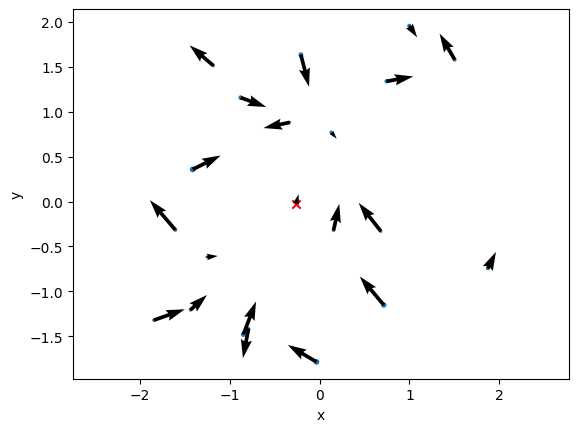

In [ ]:
plt.scatter(rs[:,0], rs[:,1], s= ms)
plt.scatter(R_cm[0], R_cm[1], color='red', marker='x')

plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')


plt.quiver(rs[:,0], rs[:,1], vs[:,0], vs[:,1], scale= 30)
plt.quiver(R_cm[0], R_cm[1],V_cm[0], V_cm[1], scale = 30);

Teniendo en cuenta que el sistema de coordenadas con respecto al cual se generaron las posiciones y velocidades de los N cuerpos es el origen de coordenadas cartesianas $(x,y,z) =(0,0,0)$, realizamos a continuación el cálculo del momentun angular total del sistema:

$$\vec{L} = \sum m_i \vec{r_i} \times \dot{\vec{r_i}}$$

In [ ]:
def momentum_angular_origen(ms, rs, vs):
  L_o = np.zeros(3)
  for i in range(N):
    L_o += np.cross(ms[i] * rs[i], vs[i])
  return L_o

L= momentum_angular_origen(ms, rs, vs)
print(f'El momentum angular total del sistema respecto al origen de coordenadas es {L}')

El momentum angular total del sistema respecto al origen de coordenadas es [ -1.45696319  -7.61511972 -66.17020752]


Ahora, calculemos el momento angular total del sistema con respecto al centro de masa. Comenzamos por tener en cuenta que:

$$\vec{L} = \vec{R}_{CM} \times \vec{P}_{CM} + \sum_i \vec{r_i}' \times \vec{m_i v_i}'$$

Por lo cual, el momentum angular con respecto al centro de masa es:

$$\vec{L}' =  \sum_i \vec{r_i}' \times \vec{m_i v_i}'$$

Lo primero que vamos a hacer es calcular las posiciones y velocidades de cada uno de los objetos con respecto al centro de masa:

$$\vec{r_i}' = \vec{r_i} - \vec{R}_{CM}  $$

$$\vec{v_i}' = \vec{v_i} - \vec{V}_{CM}  $$

In [ ]:
rs_cm = rs - R_cm             #hemos verificado manualmente que funciona
vs_cm = vs - V_cm

In [ ]:
def momentum_angular_cm(ms, rs_cm, vs_cm):
  L_o = np.zeros(3)
  for i in range(N):
    L_o += np.cross(rs_cm[i], ms[i] * vs_cm[i])
  return L_o

L_resp_cm = momentum_angular_cm(ms, rs_cm, vs_cm)
print(f'El momentum angular total del sistema respecto al centro de masa es {L_resp_cm}')

El momentum angular total del sistema respecto al centro de masa es [-16.75665817  -3.37845316 -53.91515774]


Verifiquemos entonces que se cumple la relación

 $$\vec{L} = \vec{R}_{CM} \times \vec{P}_{CM} + \sum_i \vec{r_i}' \times \vec{m_i v_i}'$$

In [ ]:
L_CM = np.cross(R_cm, V_cm * M)

L_sum = L_CM + L_resp_cm


L_sum - L

array([ 8.88178420e-15, -3.55271368e-15, -1.42108547e-14])

Como la resta de L_sum y L, es aproximadamente cero (varía a razón de la precision del computador), comfirmamos entonces que se cumple que:

$$\vec{R}_{CM} \times \vec{P}_{CM} + \sum_i \vec{r_i}' \times \vec{m_i v_i}' = \sum m_i \vec{r_i} \times \dot{\vec{r_i}}$$

Ahora, vamos a utilizar rebound para analizar la evolución del sistema y graficar las componentes del momento angular total del sistema, retomando el código realizado en clase


In [ ]:
sim= rb.Simulation()

for i in range(N):
  sim.add(m= ms[i], x=rs[i,0], y=rs[i,1], z=rs[i,2], vx=vs[i,0], vy=vs[i,1], vz=vs[i,2])

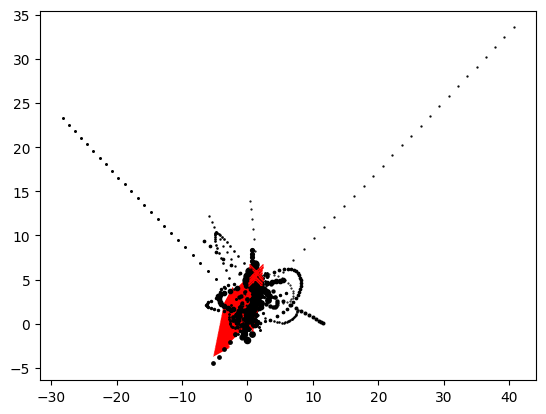

In [ ]:
fig= plt.figure()
camara = Camera(fig)

for t in np.linspace(0,10,35):
  sim.integrate(t)

  R=0
  for i in range(N):                                                            #cálculo del CM
    R += ms[i] * np.array(sim.particles[i].xyz) / M


  for i in range(N):                                                            #posiciones de los cuerpos
    plt.plot(sim.particles[i].x, sim.particles[i].y, 'ko', ms=0.5*ms[i])

  plt.plot(R[0], R[1], 'rx', ms=10)                                        #gráfico del CM

  L_vec = np.zeros(3)
  for i in range(N):
    r_vec = np.array([sim.particles[i].x, sim.particles[i].y])
    v_vec = np.array([sim.particles[i].vx, sim.particles[i].vy])

    L_vec += np.cross(r_vec, v_vec) * ms[i]


  plt.quiver(R[0], R[1],  L_vec[0], L_vec[1], color='r', scale=1e3)  #ubico el vector momento angular en el cm



  camara.snap()                                                                 #grafica y toma una foto

In [ ]:
animacion= camara.animate()

In [ ]:
HTML(animacion.to_jshtml())

Al graficar las componentes del momento angular con el paso del tiempo, observamos que efectivamenete sus componentes se mantienes aproximadamente constantes a lo largo del tiempo.

Observación: en este caso no mencionamos unidades cuando entregamos el resultado de L, pues como generamos de manera aleatoria las partículas, en realidas estamos trabajando con unidades canónicas

##2.
Usando el momentum angular de los planetas y el Sol en el sistema solar, es posible determinar la orientación del plano invariable de Laplace del Sistema. Para ello escoja una fecha arbitraria del tiempo, por ejemplo, una en la que haya ocurrido un evento científico de su interés (el nacimiento de una persona importante para la ciencia, un descubrimiento, etc.). Determine para esa fecha el vector de momento angular total del sistema solar (el Sol y los 8 planetas). Repita el mismo procedimiento para una fecha posterior y verifique que el momentum angular es el mismo.

Elijo cualquier fecha

In [ ]:
sim= rb.Simulation()
sim.units = ('kg', 'au', 'yr' )
fecha = '2021-11-25 00:00'

Tomamos la información de masa, velocidad y posición de cada uno de los planetas haciendo uso de rebound.

In [ ]:
refs = ['10', '199', '299','399', '499', '599', '699', '799', '899']

for i in refs:
  sim.add(i, date = fecha)


Searching NASA Horizons for '10'... 
Found: Sun (10) 
Searching NASA Horizons for '199'... 
Found: Mercury (199) 
Searching NASA Horizons for '299'... 
Found: Venus (299) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '499'... 
Found: Mars (499) 
Searching NASA Horizons for '599'... 
Found: Jupiter (599) 
Searching NASA Horizons for '699'... 
Found: Saturn (699) 
Searching NASA Horizons for '799'... 
Found: Uranus (799) 
Searching NASA Horizons for '899'... 
Found: Neptune (899) 


Oraganizo las masas, posiciones y velocidades

In [ ]:
ms = np.zeros(len(refs))
rs = np.zeros((len(refs), 3))
vs = np.zeros((len(refs), 3))

for i in range(len(refs)):
  ms[i] = sim.particles[i].m
  rs[i] = sim.particles[i].xyz
  vs[i] = sim.particles[i].vxyz


ms, rs, vs

(array([1.98847542e+30, 3.30110945e+23, 4.86746626e+24, 5.97236526e+24,
        6.41712021e+23, 1.89818719e+27, 5.68336103e+26, 8.68127341e+25,
        1.02412617e+26]),
 array([[-8.44872602e-03,  3.65750136e-03,  1.67539900e-04],
        [-2.69964485e-01, -3.72094385e-01, -6.54992746e-03],
        [ 5.77415053e-01,  4.27773643e-01, -2.78186900e-02],
        [ 4.45431813e-01,  8.80294635e-01,  1.20871936e-04],
        [-1.26772122e+00, -9.53735360e-01,  1.09926033e-02],
        [ 4.54496781e+00, -2.06179689e+00, -9.31283800e-02],
        [ 6.81449147e+00, -7.20615126e+00, -1.46013266e-01],
        [ 1.44892322e+01,  1.33822948e+01, -1.38008392e-01],
        [ 2.96093580e+01, -4.20299657e+00, -5.95824503e-01]]),
 array([[-1.38517360e-03, -3.04234194e-03,  5.66433654e-05],
        [ 6.35531380e+00, -5.38907727e+00, -1.02316278e+00],
        [-4.35602134e+00,  5.94938063e+00,  3.33037378e-01],
        [-5.68191491e+00,  2.86383010e+00, -1.60823124e-04],
        [ 3.28292996e+00, -3.634666

Una vez tenemos la información necesaria acerca de los planetas (y el Sol), procedemos a calcular el vector momento angular:



In [ ]:
def momento_angular(ms, rs, vs, N = len(refs)):
  L_o = np.zeros(3)
  for i in range(N):
    L_o += np.cross(ms[i] * rs[i], vs[i])
  return L_o

Hemos encontrado el vector momento angular del sistema de 8 planetas y sol del sistema solar, en unidades $kg\frac{AU^2}{yr}$

In [ ]:
L_tot= momento_angular(ms, rs, vs)
L_tot

array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28])

Ahora, veamos si obtenemos el mismo resultado al transcurso de un año:

In [ ]:
fecha_posterior= '2022-11-25 00:00'

for i in refs:
  sim.add(i, date = fecha_posterior)

rs = np.zeros((len(refs), 3))
vs = np.zeros((len(refs), 3))

for i in range(len(refs)):
  ms[i] = sim.particles[i].m
  rs[i] = sim.particles[i].xyz
  vs[i] = sim.particles[i].vxyz

L_tot_pos= momento_angular(ms, rs, vs)
L_tot_pos

Searching NASA Horizons for '10'... 
Found: Sun (10) 
Searching NASA Horizons for '199'... 
Found: Mercury (199) 
Searching NASA Horizons for '299'... 
Found: Venus (299) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '499'... 
Found: Mars (499) 
Searching NASA Horizons for '599'... 
Found: Jupiter (599) 
Searching NASA Horizons for '699'... 
Found: Saturn (699) 
Searching NASA Horizons for '799'... 
Found: Uranus (799) 
Searching NASA Horizons for '899'... 
Found: Neptune (899) 


array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28])

Nuevamente, las unidades del resultado que entregamos es en $kg\frac{AU^2}{yr}$

In [ ]:
L_tot, L_tot_pos

(array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28]),
 array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28]))

Queda entonces verificado que el momento angular en una fecha inicial es el mismo que transcurrido un año, y en general, se debe conservar con el paso del tiempo

##3.
Las componentes cartesianas del momentum angular total calculada en el punto 2, están referidas al sistema de la Eclíptica con eje X apuntando hacia el punto bernal de la época J2000 (2000-01-01 12:00:00 TDB). Determine, usando esas componentes las coordenadas eclípticas hacia las que apunta ese vector. Convierta esas coordenadas en coordenadas ecuatoriales absolutas (ascensión recta y declinación) y estime la ubicación entre las constelaciones en las que se encuentra el *polo de Laplace del Sistema Solar*.

  **Ayuda**: Las coordenadas eclípticas se obtienen convirtiendo las componentes cartesianas del momentum angular en componentes esféricas. Los ángulos resultantes son la longitud y latitud eclíptica. Para la conversión de coordenadas eclítpicas puede usar lo aprendido en el curso de astronomía de posición o preguntar al profesor por un método usando `SPICE`.

Comenzamos calculando las coordenadas eclípticas a las que apunta el vector momento angular total del Sistema.

El desarrollo del procedimiento que vamos a seguir en las siguientes celdas, se encuentra descrito en la siguiente imagen:  [procedimiento para hallar los ángulos de longitud y latitud eclíptica](https://drive.google.com/file/d/1pq1KWQas32T04ZArVPdFidIBSBB7G6q5/view?usp=sharing)

In [ ]:
L_x = L_tot[0]
L_y = L_tot[1]
L_z = L_tot[2]

L_norm = np.linalg.norm(L_tot)

Las siguientes son las coordenadas eclípticas en las cuales apunta el vector de momento angular calculado en el punto 2

Tenemos en cuenta que el valor de $\theta$ que obtenemos de la conversion a coordenadas esféricas, no es la latitud eclíptica, sino que lo es su ángulo complementario, pues $\theta$ es medido con respecto.




In [ ]:
long_ecl = phi = np.arctan(L_y / L_x)
theta = np.arccos(L_z / L_norm)
lat_ecl =  np.pi / 2 - theta

Ahora, la idea es convertir estas coordenadas eclíticas en coordenadas ecuatoriales absolutas.

Para ello, retomo un código realizado por mí en el cuerso astronomía de posicion, el cual puede entontrar [aquí](https://colab.research.google.com/drive/1cRT2kdIWzEnOpANVmENqQ_pF2nkyvnGd?usp=sharing) en la sección transformación de coordenadas eclípticas a ecuatoriales. Es importante recalcar que el código mostrado aquí puede contener algunas variaciones con respecto al original, pues se revisan las ecuaciones presentadas en la función con respecto a las presentadas en la pagina 108 (capítulo 6) del libro "Elementos de astronomía de posición".

En el código:

- $\epsilon$ = e es la inclinación del plano de la eclíptica con respecto al ecuador celeste


In [ ]:
def conversion_a_grados(grados, minutos, segundos):
  seg_a_min = segundos / 60
  min = minutos + seg_a_min
  grados = grados + (min / 60)
  return grados

e= conversion_a_grados(23,26,0) * np.pi / 180        #en radianes

def eclipticas_a_ecuatoriales(lat_e, long_e):
  '''ingresar los valores de latitud y longitud eclíptica en radianes'''

  dec= np.arcsin(np.sin(lat_e) * np.cos(e) + np.cos(lat_e) * np.sin(e) * np.sin(long_e))

  p = np.cos(lat_e) * np.cos(e) * np.sin(long_e) - np.sin(lat_e) * np.sin (e)
  q = np.cos(lat_e) * np.cos(long_e)
  ar = np.arctan(p/q)

  if p * q < 0 and q<0:
    ar = ar + np.pi
  elif p * q < 0 and q>0:
    ar = ar + 2* np.pi
  elif p+q < 0:
    ar = ar + np.pi
  else:
    ar = np.arctan(p/q)


  return dec, ar, dec * 180 / np.pi, ar * 180 / np.pi   #en radianes y en grados

Resitramos los valores de dec, ar en grados; pero usando un código (que también encuentra en el enlace citado previamente) para convertir esos grados a grados, minutos y segundos.

In [ ]:
def gra_2_gra_min_sec (grados):
  gra = int(grados)
  min = int((grados - gra)*60)
  sec = ((grados - gra)*60 - min)*60
  return gra, min, sec

def grados_a_horas(grados):
  horas = grados/15
  hora = int(horas)
  rem_1 = horas - hora
  minutos = int(rem_1 * 60)
  rem_2 = rem_1 * 60 - minutos
  segundos = rem_2 * 60
  return (hora, minutos, segundos)

In [ ]:
dec, ar = eclipticas_a_ecuatoriales(lat_ecl, long_ecl)[2:]
dec = gra_2_gra_min_sec(dec)
ar = grados_a_horas(ar)

In [ ]:
print(f'La ascensión recta y declinación, en la cual apunta el polo de Laplace del sistema solar respectivamente son {ar} y {dec}')
print('(medidos en horas, minutos y segundos, y grados, minutos y segundos) ')

La ascensión recta y declinación, en la cual apunta el polo de Laplace del sistema solar respectivamente son (18, 15, 24.244563788565188) y (66, 59, 46.35838217465448)
(medidos en horas, minutos y segundos, y grados, minutos y segundos) 


A partir de la siguiente imagen [ver aquí](https://drive.google.com/file/d/1oePOSVIxrM_wyyzsUUPUgk0Me-IWbfqD/view?usp=sharing)  se observa que el polo de Laplace del sistema Solar apunta sobre la constelación de Dragón

##4.
Calcule, para la fecha en 2, el momentum angular de los planetas individuales. Determine el ángulo que forman esos momentos angulares con respecto al momento angular total. Ese ángulo corresponde a la inclinación de la órbita osculatriz del planeta en el momento del cálculo del momentum angular total. Haga una tabla de esas inclinaciones comparando los valores obtenidos con las inclinaciones orbitales promedio de las órbitas de los planetas con respecto de la eclíptica que pueden consultarse en internet.

  **Ayuda**: Para calcular el ángulo entre dos vectores puede usar el producto punto entre ellos.

Comenzamos por recordar la fecha que usamos en el punto 2

In [ ]:
fecha

'2021-11-25 00:00'

Ahora, para la fecha anterior, calculamos el momento angular de los planteas individuales retomando una parte del código realizado en el punto 2.

In [ ]:
sim= rb.Simulation()
sim.units = ('kg', 'au', 'yr' )
refs = ['199', '299','399', '499', '599', '699', '799', '899']
planetas= np.array(['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno'])
Ls = np.zeros((len(refs), 3))

for i in refs:
  sim.add(i, date = fecha)

ms = np.zeros(len(refs))
rs = np.zeros((len(refs), 3))
vs = np.zeros((len(refs), 3))

for i in range(len(refs)):
  ms[i] = sim.particles[i].m
  rs[i] = sim.particles[i].xyz
  vs[i] = sim.particles[i].vxyz

for i in range(len(refs)):
  Ls[i] = np.cross(ms[i] * rs[i], vs[i])

Searching NASA Horizons for '199'... 
Found: Mercury (199) 
Searching NASA Horizons for '299'... 
Found: Venus (299) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '499'... 
Found: Mars (499) 
Searching NASA Horizons for '599'... 
Found: Jupiter (599) 
Searching NASA Horizons for '699'... 
Found: Saturn (699) 
Searching NASA Horizons for '799'... 
Found: Uranus (799) 
Searching NASA Horizons for '899'... 
Found: Neptune (899) 


Recordamos el vector de momento angular que obtuvimos previamente:


In [ ]:
L_tot

array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28])

Procedemos ahora a entontrara el ángulo que forman estos momentos angulares con respecto al momento angular total.

Para ello, hacemos uso del producto punto de la siguiente manera:

$$\vec A \cdot \vec B = |A||B| cos(\theta)$$

$$\theta = cos^{-1}(\frac{\vec A \cdot \vec B}{|A||B|})$$

Sin embargo, debemos tener cuidado con el resultado de $\theta$, pues el coseno inverso nos entrega resultados entre 0° y 180°. Para verificar si nuestro ángulo se encuentra en el tercer o cuaro cuadrante, realizamos el producto vectorial entre los vectores A y B, tal que si sale negativo, realizamos el procedimiento $\theta_c = 2\pi - \theta$

In [ ]:
L_norm = np.linalg.norm(L_tot)
Ls_norm = np.zeros(len(refs))
thetas = np.zeros(len(refs))

for i in range(len(refs)):
  Ls_norm[i] = np.linalg.norm(Ls[i])

for i in range(len(refs)):
  A = L_norm
  B = Ls_norm[i]
  vec_A = L_tot
  vec_B = Ls[i]
  p_punto = np.dot(vec_A, vec_B)
  cros = np.linalg.norm(np.cross(vec_A, vec_B))
  theta = np.arccos(p_punto / (A * B))
  if cros > 0 :                             #cros > 0 --> el angulo en el primer o segundo cuadrante
    theta = theta

  elif cros == 0 :                          #cros = 0 --> se define si el angulo que forman es cero o 180
    if p_punto > 0:
      theta = np.pi
    else:
      theta = 0

  else:                                     #cros < 0 --> el angulo está en el tercer o cuarto cuadrante
    theta = 2 * np.pi - theta

  thetas[i] = theta

In [ ]:
thetas   #en radianes

array([0.11117088, 0.03850633, 0.02763678, 0.02934484, 0.00569121,
       0.0162357 , 0.01792397, 0.01266727])

Sin embargo, notamos que sin poner los condicionales obtenemos el mismo resultado, pues los valores de $\theta$ tal como se esperaría son muy pequeños

In [ ]:
for i in range(len(refs)):
  A = L_norm
  B = Ls_norm[i]
  vec_A = L_tot
  vec_B = Ls[i]
  p_punto = np.dot(vec_A, vec_B)
  cros = np.linalg.norm(np.cross(vec_A, vec_B))
  theta = np.arccos(p_punto / (A * B))
  thetas[i] = theta

thetas

array([0.11117088, 0.03850633, 0.02763678, 0.02934484, 0.00569121,
       0.0162357 , 0.01792397, 0.01266727])

Ahora, registremos las inclinaciones orbitales promedio de las órbitas de los planetas con respecto a la eclíptica (en grados), que obtuvimos de [aquí](http://www.sc.ehu.es/sbweb/fisica_/celeste/solar/sistema_solar.html)

In [ ]:
inclinaciones = np.array([7, 3.4, 0, 1.8, 1.3, 2.5, 0.8, 1.8])
incli_rad = inclinaciones * np.pi / 180

In [ ]:
df = pd.DataFrame()
df['planeta'] = planetas
df['theta (rad)'] = thetas
df['inclinaciones orbitales (rad)'] = incli_rad
df

,planeta,theta (rad),inclinaciones orbitales (rad)
0,Mercurio,0.111171,0.122173
1,Venus,0.038506,0.059341
2,Tierra,0.027637,0.000000
3,Marte,0.029345,0.031416
4,Júpiter,0.005691,0.022689
5,Saturno,0.016236,0.043633
6,Urano,0.017924,0.013963
7,Neptuno,0.012667,0.031416


Observamos que si bien los resultados no son iguales, tampoco sse encuentran muy alejados los unos de los otros

##5.
Estudiemos ahora como cambia la orientación de la órbita de la Tierra con respecto al plano invariable de Laplace, es decir, como cambia el ángulo del momentum angular de la Tierra respecto al momentum angular total. Para ello tomemos un período de tiempo largo, 1 o 2 siglos, lo que permita `SPICE` o `Astroquery`. Haga un gráfico del ángulo en función del tiempo y estudie la figura resultante. Trate de interpretar lo que ve.


Como punto de partida vamos a elegir la fecha que tomamos en 2, y la idea es ver como evoluciona la Tierra a lo largo de 1 siglo

Recordamos primero el momento angular total calculado en el punto 2, en las unidades $kg\frac{AU^2}{yr}$

In [ ]:
L_tot

array([1.15916495e+27, 3.66852461e+26, 4.41477881e+28])

Definimos la fecha de partida en dias julianos, para luego ingresarlo a horizons

In [ ]:
et = spy.utc2et(fecha)
jd= spy.unitim(et, 'ET', 'JDTDB')        #fecha en JD

Retomamos la masa de la Tierra de una de las calculadas en el punto 4, tal que corresponde a la ubicacion 2 en ms

In [ ]:
m_tierra = ms[2]
m_tierra

5.972365262433514e+24

Creamos una función que haga la consulta en astroquery acerca de la información de la Tierra a lo largo de un siglo (o un tiempo mayor y prolongado) y que directamente nos retorne los diferentes valores del momento angular

**Observación:** con la ayuda de Gemini, la AI de google, obtuve una forma más óptima de apilar los x, y, z en arreglos que me den las coordenadas (x,y,z) para cada instante de tiempo, que es usando np.stack((x,y,z), axis=1).

Este código lo que hace es apilar los arrays x, y, z y el resultado es arreglos de tres dimensiones, donde cada fila respresenta un punto en el tiempo y las tres columnas representan las coordenadas x,y,z

El rs comentado fue mi propuesta inicial, pero soy conciente de que no es una forma muy eficiente computacionalmente hablando; por ello decido consultar una altertiva que no incluya ciclos for de manera explícita. Cabe resaltar que se hizo la comparación con valores sencillos de que ambas lineas de código hacen el mismo trabajo

In [ ]:
fechas = {'start':'1624-03-12 00:00',
        'stop':'2024-03-12 00:00',
        'step': '365d'}

consulta = Horizons(
    id= '399',
    location='@SSB',
    epochs= fechas        #miramos como es la evolución año tras año
)

tabla = consulta.vectors().to_pandas()

x = tabla.x
y = tabla.y
z = tabla.z

vx = tabla.vx
vy = tabla.vy
vz = tabla.vz

#rs = np.array([[x[i],y[i],z[i]] for i in range(len(x))])
rs = np.stack((x, y, z), axis=1)
vs = np.stack((vx, vy, vz), axis=1)

m_tierra = ms[2]

#momento angular el cada cambio de tiempo
Ls = m_tierra * np.cross(rs, vs)

#calculamos el angulo de los Ls (tierra) y L_tot
n_años = len(x)
L_norm = np.linalg.norm(L_tot)
Ls_norm = np.zeros(n_años)
thetas = np.zeros(n_años)

for i in range(n_años):
  Ls_norm[i] = np.linalg.norm(Ls[i])

for i in range(n_años):
  A = L_norm
  B = Ls_norm[i]
  vec_A = L_tot
  vec_B = Ls[i]
  p_punto = np.dot(vec_A, vec_B)
  cros = np.linalg.norm(np.cross(vec_A, vec_B))
  theta = np.arccos(p_punto / (A * B))
  if cros > 0 :                             #cros > 0 --> el angulo en el primer o segundo cuadrante
    theta = theta

  elif cros == 0 :                          #cros = 0 --> se define si el angulo que forman es cero o 180
    if p_punto > 0:
      theta = np.pi
    else:
      theta = 0

  else:                                     #cros < 0 --> el angulo está en el tercer o cuarto cuadrante
    theta = 2 * np.pi - theta

  thetas[i] = theta




Observamos los valores de theta que obtuvimos

In [ ]:
thetas

array([0.02806172, 0.02808308, 0.02812172, 0.02807849, 0.02805426,
       0.02799834, 0.02793808, 0.02793123, 0.02789819, 0.02794916,
       0.02796701, 0.02799654, 0.02803328, 0.02799722, 0.02799679,
       0.02791965, 0.02786114, 0.02779359, 0.02771479, 0.02771265,
       0.02768485, 0.02774662, 0.02779259, 0.02784124, 0.0279154 ,
       0.02791106, 0.02794975, 0.02791329, 0.02788937, 0.02787129,
       0.02782075, 0.02785672, 0.02785354, 0.02792118, 0.02797297,
       0.02800015, 0.02805847, 0.02801735, 0.02802293, 0.02795484,
       0.0278805 , 0.02783732, 0.02774184, 0.02774384, 0.02771444,
       0.02774615, 0.02778449, 0.02778655, 0.02784173, 0.02779821,
       0.02780526, 0.02776148, 0.02770288, 0.02770011, 0.02764095,
       0.02768941, 0.02770857, 0.02777248, 0.02785983, 0.02788131,
       0.02796364, 0.0279414 , 0.02795158, 0.02792195, 0.02785119,
       0.02784786, 0.02776627, 0.02778924, 0.02778915, 0.02780211,
       0.02786379, 0.02784022, 0.02788218, 0.02783176, 0.02780

Y miramos la diferencia entre el primer y ultimo valor

In [ ]:
#en radianes
(thetas[1] - thetas[-1] )

0.0004761567275324667

In [ ]:
#en grados
(thetas[1] - thetas[-1] ) * 180 / np.pi

0.027281770874371027

Ahora si graficamos

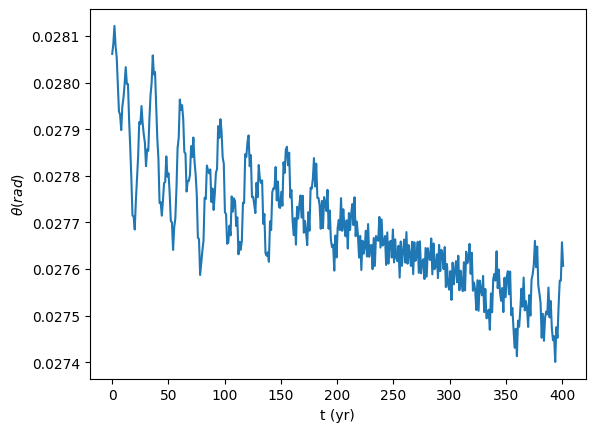

In [ ]:
t = np.linspace(0,n_años, n_años)
plt.plot(t, thetas)
plt.xlabel('t (yr)')
plt.ylabel('$\\theta (rad)$');

Observamos he hemos obtenido un patrón oscilante, que en primer lugar podría asemejarse a una linea recta (ojo: como un vistazo muy general), sin embargo,se trata de un patrón oscilante que tiende a la disminución con el paso del timepo. Ahora, ¿Cómo interpretamos este resultado?:

Pienso que tiene sentido que el angulo que forma el momento angular de la tierra tienda al decrecimiento, pero en principio, sin conocer el comportamiento del angulo que forma el momento angular de los demás planetas con el momento angular total del sistema resulta un poco complicado dar una respuesta a estas 'oscilaciones'.Sin embargo, tal como se observa en celdas previas, y en el eje theta de la gráfica anterior, el cambio de los angulos es muy pequeña y de hecho al cabo de 400 años el ángulo disminuye unos 0.027°.

Finalmente, este cambio se puede interpretar en términos de la órbita osculatriz de la Tierra, pues sabemos que no es una orbita cerrada, sino que su momento angular va a cambiar de a poco con el paso del tiempo.

Es importante además mencionar que en las previas lineas de código se usa el hecho mostado en el punto 2: El momento angular total del sistema solar se conserva